### Import necessary libraries for our eda

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
# Configure plotting style
sns.set(style='whitegrid')

 Load Dataset

In [ ]:
# File path to the dataset
file_path = '../data/raw/MachineLearningRating_v3.txt'

# Load the dataset using the correct delimiter
try:
    df = pd.read_csv(file_path, delimiter='|')
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading file: {e}")

# Display the first few rows to verify the structure
print("First 5 rows of the dataset:")
print(df.head())


C:\Users\helin\AppData\Local\Temp\ipykernel_18308\2393932107.py:8: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|')


Dataset loaded successfully!
First 5 rows of the dataset:
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverC

### Overview of the Dataset

In [12]:
# Basic structure and summary of the dataset
print("Dataset Info:")
print(df.info())

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province     

# Key Observations

## Missing Values
- Significant missing data in columns like:
  - **Bank**: 854,137 non-null out of 1,000,098.
  - **AccountType**, **MaritalStatus**, and **Gender**.
  - **CustomValueEstimate**: Only ~22% populated.
  - **CrossBorder**: Almost entirely missing.
  - **NumberOfVehiclesInFleet**: Completely missing.
- Columns with excessive missing data (e.g., **CrossBorder**, **NumberOfVehiclesInFleet**) may need to be dropped or carefully handled.

## Data Types
- **TransactionMonth** should be converted to a `datetime` format for proper time-series analysis.
- **mmcode**, **Cylinders**, **cubiccapacity**, **kilowatts**, etc., might need unit verification or normalization.

## Statistical Anomalies
- Negative values in **TotalPremium** and **TotalClaims** indicate potential data entry issues.
- Zero values in key metrics (e.g., **CustomValueEstimate**, **SumInsured**, **CalculatedPremiumPerTerm**) could represent defaults or missing entries needing attention.

## Cardinality
- Categorical columns like **Bank**, **Province**, **Product**, and **CoverCategory** should be analyzed for unique value distribution to identify sparsity or high cardinality.


In [ ]:
print("Dataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province     

### Handle Missing Data

In [15]:
# Drop columns with excessive missing data
columns_to_drop = ['CrossBorder', 'NumberOfVehiclesInFleet']
df.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns: {columns_to_drop}")

# Impute missing values
df['Bank'].fillna('Unknown', inplace=True)
df['AccountType'].fillna('Unknown', inplace=True)
df['MaritalStatus'].fillna('Unknown', inplace=True)
df['Gender'].fillna('Unknown', inplace=True)
df['CustomValueEstimate'].fillna(df['CustomValueEstimate'].median(), inplace=True)

# Verify missing values are handled
print("Remaining Missing Values:")
print(df.isnull().sum())


Dropped columns: ['CrossBorder', 'NumberOfVehiclesInFleet']


C:\Users\helin\AppData\Local\Temp\ipykernel_18308\2484297751.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bank'].fillna('Unknown', inplace=True)
C:\Users\helin\AppData\Local\Temp\ipykernel_18308\2484297751.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

Remaining Missing Values:
UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
Title                            0
Language                         0
Bank                             0
AccountType                      0
MaritalStatus                    0
Gender                           0
Country                          0
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
ItemType                         0
mmcode                         552
VehicleType                    552
RegistrationYear                 0
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                

### Convert Data Types

In [ ]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
print("TransactionMonth converted to datetime format!")


TransactionMonth converted to datetime format!


### Handle Outliers

In [17]:
df = df[(df['TotalPremium'] >= 0) & (df['TotalClaims'] >= 0)]
print("Filtered rows with negative TotalPremium and TotalClaims.")


Filtered rows with negative TotalPremium and TotalClaims.


### Explore Categorical Data

In [18]:
categorical_columns = ['CoverCategory', 'CoverType', 'CoverGroup', 'Product']
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("-" * 50)


Value counts for CoverCategory:
CoverCategory
Passenger Liability                                    104134
Third Party                                            102801
Keys and Alarms                                        102402
Signage and Vehicle Wraps                              102392
Emergency Charges                                      102391
Cleaning and Removal of Accident Debris                102390
Windscreen                                              97289
Own Damage                                              78955
Income Protector                                        59996
Basic Excess Waiver                                     53717
Accidental Death                                        27294
Credit Protection                                       18070
Own Damage.                                             15095
Own damage                                               8764
Windscreen (2015)                                        6450
Income Protector (2015) 

### Correlation Analysis

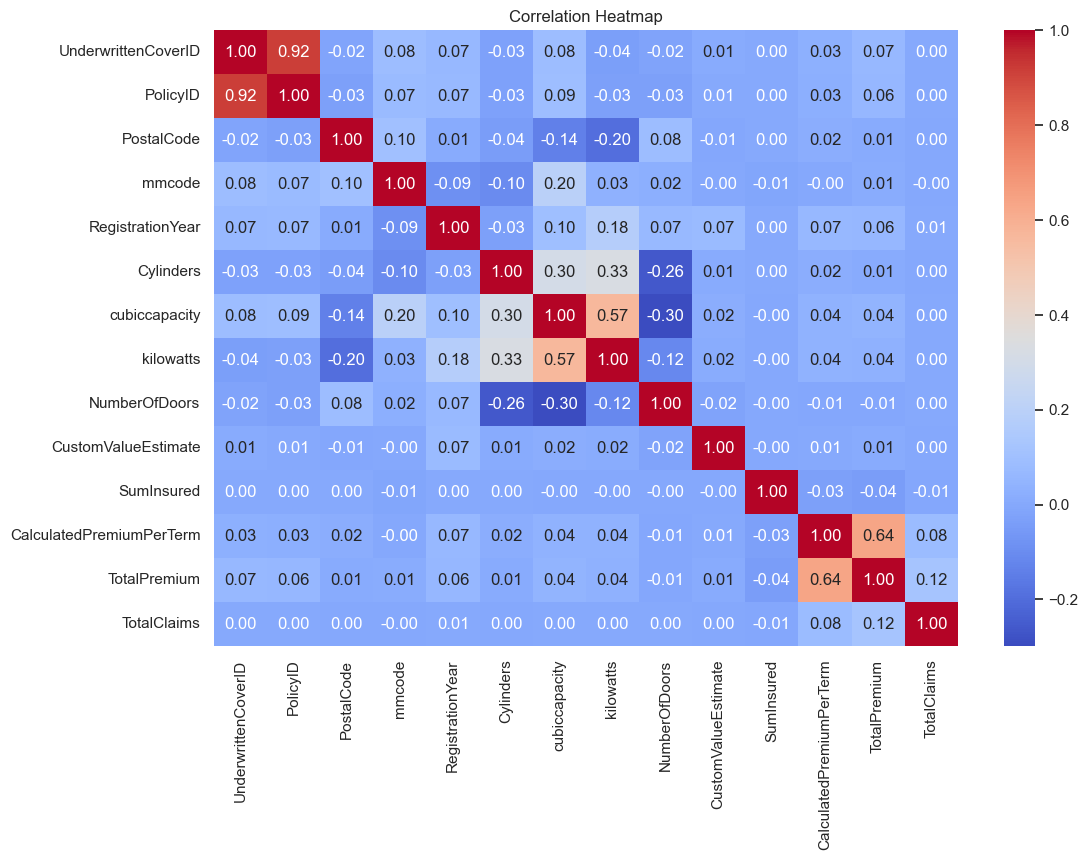

In [20]:
# Filter only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [21]:
# Identify columns with non-numeric values
for col in numeric_df.columns:
    try:
        pd.to_numeric(df[col])
    except ValueError:
        print(f"Non-numeric values found in column: {col}")


### Save Cleaned Dataset

In [22]:
output_path = '../data/processed/cleaned_dataset.csv'  # Update path as needed
df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")


Cleaned dataset saved to ../data/processed/cleaned_dataset.csv


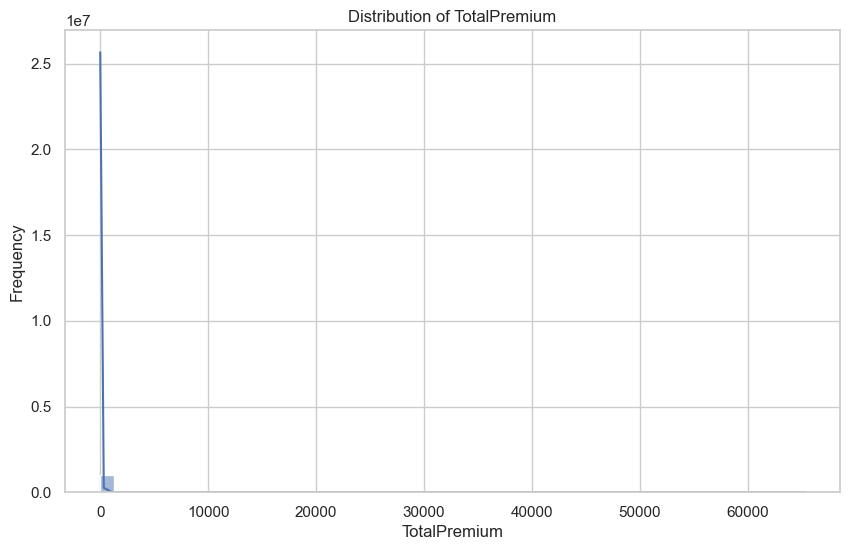

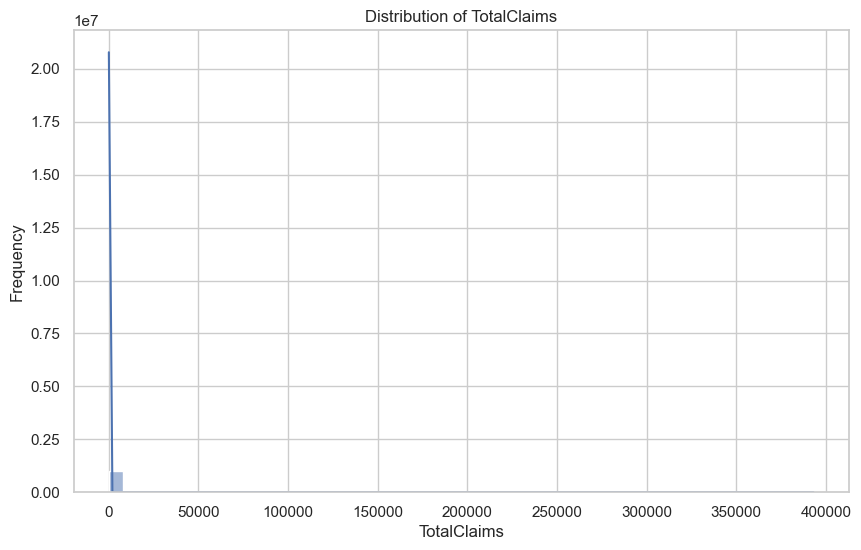

In [23]:
# Plot histogram for TotalPremium
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPremium'], bins=50, kde=True)
plt.title('Distribution of TotalPremium')
plt.xlabel('TotalPremium')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for TotalClaims
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalClaims'], bins=50, kde=True)
plt.title('Distribution of TotalClaims')
plt.xlabel('TotalClaims')
plt.ylabel('Frequency')
plt.show()


That usually happens when the column data is mostly zeros or non-numeric values causing the histogram to show just a spike at zero or the plot to misbehave.

### 1. Check unique values and zeros count in TotalPremium and TotalClaims

In [30]:
print("TotalPremium unique values (top 10):")
print(df['TotalPremium'].value_counts().head(10))

print("\nTotalClaims unique values (top 10):")
print(df['TotalClaims'].value_counts().head(10))

print("\nCount of zero TotalPremium:", (df['TotalPremium'] == 0).sum())
print("Count of zero TotalClaims:", (df['TotalClaims'] == 0).sum())


TotalPremium unique values (top 10):
TotalPremium
0.000000     381631
21.929825     49731
74.561404     34382
78.947368     30400
43.859649     16919
15.789474     10939
92.105263      3424
96.491228      2921
4.834123       2443
1.933684       2272
Name: count, dtype: int64

TotalClaims unique values (top 10):
TotalClaims
0.000000        997017
6140.350877        326
750.649123         101
1300.000000         59
850.000000          51
877.192982          45
43859.649123        41
1150.000000         31
3070.175439         28
657.894737          24
Name: count, dtype: int64

Count of zero TotalPremium: 381631
Count of zero TotalClaims: 997017


### 2. Plot distributions but exclude zeros to better see the actual spread

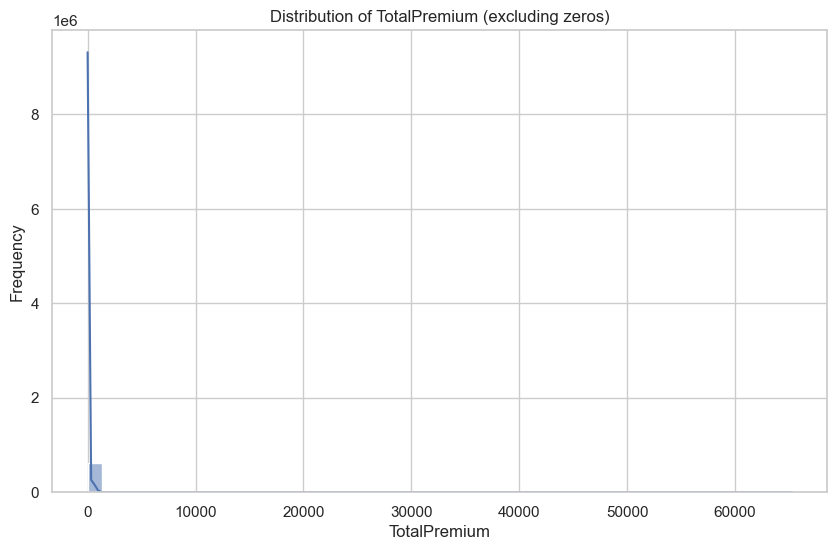

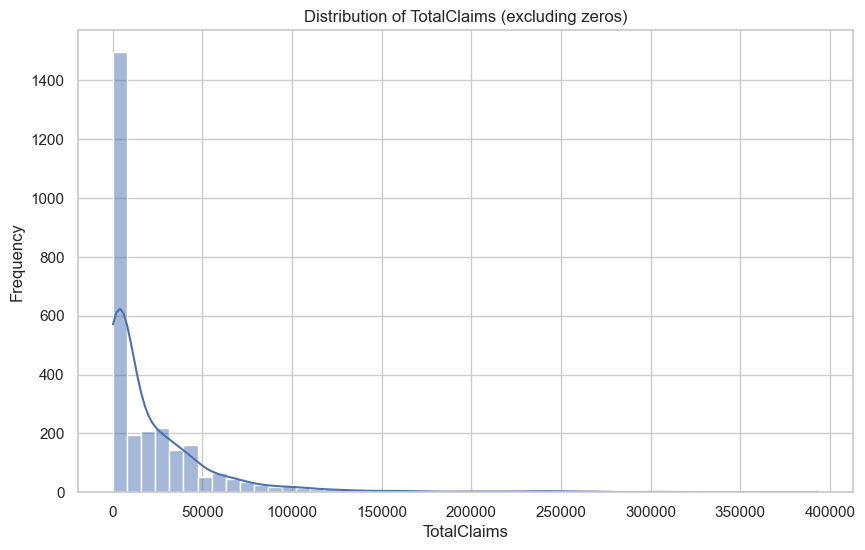

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['TotalPremium'] > 0]['TotalPremium'], bins=50, kde=True)
plt.title('Distribution of TotalPremium (excluding zeros)')
plt.xlabel('TotalPremium')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df[df['TotalClaims'] > 0]['TotalClaims'], bins=50, kde=True)
plt.title('Distribution of TotalClaims (excluding zeros)')
plt.xlabel('TotalClaims')
plt.ylabel('Frequency')
plt.show()


In [33]:
# Analyze zeros in TotalPremium and TotalClaims

total_records = len(df)

zero_premium_count = (df['TotalPremium'] == 0).sum()
zero_claims_count = (df['TotalClaims'] == 0).sum()

print(f"Total records: {total_records}")
print(f"TotalPremium zeros: {zero_premium_count} ({zero_premium_count/total_records:.2%})")
print(f"TotalClaims zeros: {zero_claims_count} ({zero_claims_count/total_records:.2%})")

# Check average TotalPremium where it is zero (should be zero but just to confirm)
print("\nAverage TotalPremium where TotalPremium is zero:")
print(df.loc[df['TotalPremium'] == 0, 'TotalPremium'].mean())

# Check if policies with zero premium still have claims
zero_premium_with_claims = df[(df['TotalPremium'] == 0) & (df['TotalClaims'] > 0)].shape[0]
print(f"\nPolicies with zero TotalPremium but non-zero claims: {zero_premium_with_claims}")

# Summary stats for policies with zero claims
print("\nSummary stats for policies with zero TotalClaims:")
print(df[df['TotalClaims'] == 0][['TotalPremium', 'TotalClaims']].describe())


Total records: 999805
TotalPremium zeros: 381631 (38.17%)
TotalClaims zeros: 997017 (99.72%)

Average TotalPremium where TotalPremium is zero:
0.0

Policies with zero TotalPremium but non-zero claims: 147

Summary stats for policies with zero TotalClaims:
        TotalPremium  TotalClaims
count  997017.000000     997017.0
mean       60.852276          0.0
std       172.577024          0.0
min         0.000000          0.0
25%         0.000000          0.0
50%         2.174825          0.0
75%        21.929825          0.0
max     65282.603421          0.0


# 🕵️‍♂️ Insights from Zeros Analysis

- **TotalPremium zeros (38%)**:  
  🛑 A large chunk of policies have **zero premium**, which seems unusual — usually every policy should have a premium.  
  ❓ Could these be inactive, canceled policies? Or just data entry placeholders?  
  🔍 Worth checking if there’s a **status column** or similar metadata.

- **TotalClaims zeros (99.7%)**:  
  📉 Almost all policies have **zero claims**, which makes sense because most insurance policies don’t have claims in a given period.

- **147 policies with zero premium but positive claims**:  
  ⚠️ Strange case since you'd expect a premium payment before a claim.  
  🤔 Could be errors or special cases like refunds, freebies, or claims from prior periods?

---

## 📊 Summary stats for zero claims:
- Average premium is about **60** with a huge standard deviation.  
- Some policies pay very high premiums but never claimed — this is expected.

---

## 🔜 What to do next?

- Investigate those **zero-premium records** more closely:  
  - Are they flagged in any way?  
  - Are they tied to certain **Province**, **Vehicle Type**, or **Time**?  
- Perform a quick distribution check on zero-premium policies for categorical features.  
- Explore categorical distributions like **Province**, **Gender**, **VehicleType** to see if zero-premium records cluster in specific groups.


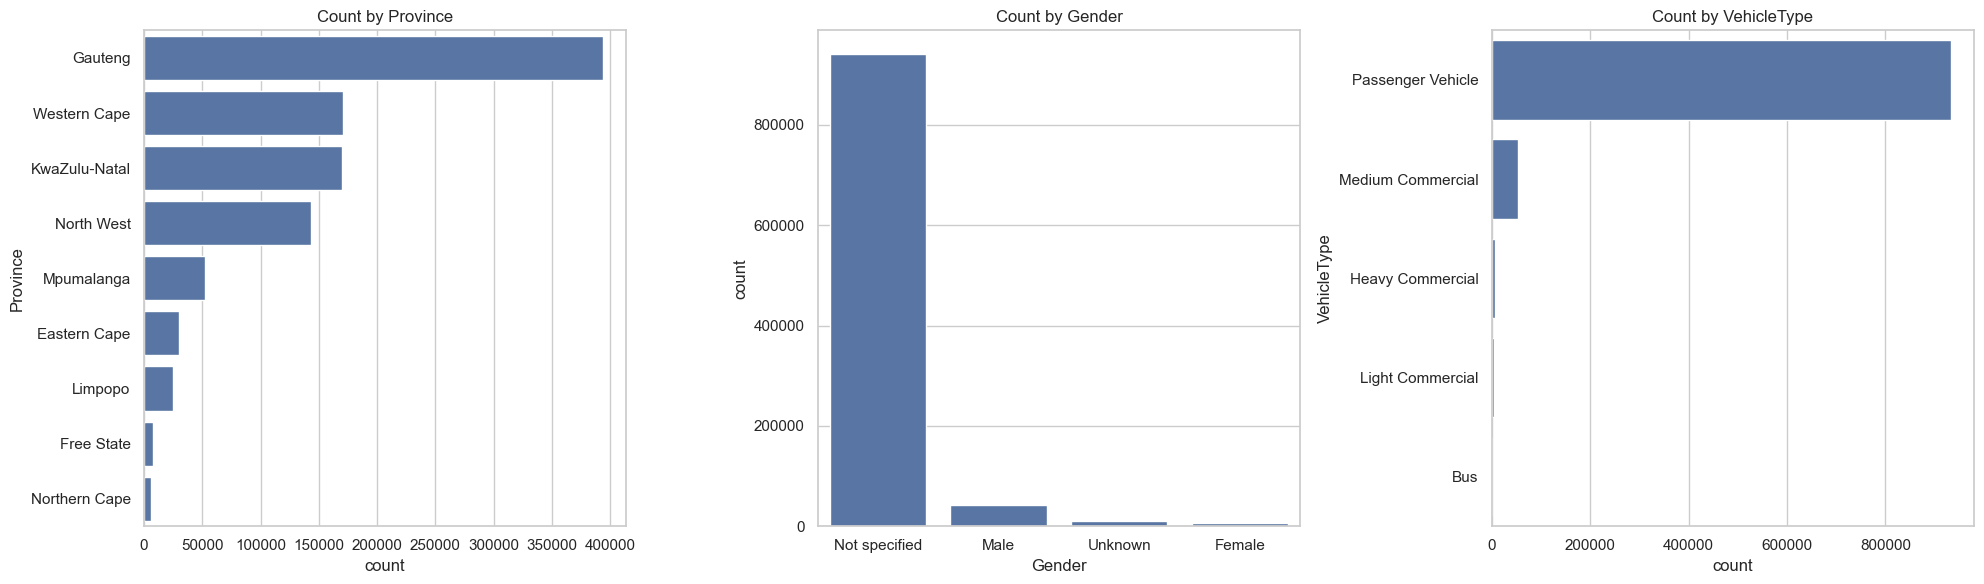

In [34]:
# Distribution counts for Province, Gender, VehicleType

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(data=df, y='Province', order=df['Province'].value_counts().index, ax=axs[0])
axs[0].set_title('Count by Province')

sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index, ax=axs[1])
axs[1].set_title('Count by Gender')

sns.countplot(data=df, y='VehicleType', order=df['VehicleType'].value_counts().index, ax=axs[2])
axs[2].set_title('Count by VehicleType')

plt.tight_layout()
plt.show()


In [36]:
# Filter zero TotalPremium records
zero_premium_df = df[df['TotalPremium'] == 0]

print(f"Total zero-premium records: {len(zero_premium_df)}")

# Distribution by Province
province_counts = zero_premium_df['Province'].value_counts(normalize=True) * 100
print("Zero Premium Distribution by Province (%):")
print(province_counts)

# Distribution by VehicleType
vehicle_type_counts = zero_premium_df['VehicleType'].value_counts(normalize=True) * 100
print("\nZero Premium Distribution by VehicleType (%):")
print(vehicle_type_counts)

# Distribution by TransactionMonth
transaction_month_counts = zero_premium_df['TransactionMonth'].value_counts(normalize=True) * 100
print("\nZero Premium Distribution by TransactionMonth (%):")
print(transaction_month_counts)


Total zero-premium records: 381631
Zero Premium Distribution by Province (%):
Province
Gauteng          40.107067
Western Cape     19.395961
KwaZulu-Natal    15.103333
North West       14.015633
Mpumalanga        5.516585
Eastern Cape      2.787509
Limpopo           1.788901
Northern Cape     0.717185
Free State        0.567826
Name: proportion, dtype: float64

Zero Premium Distribution by VehicleType (%):
VehicleType
Passenger Vehicle    93.393636
Medium Commercial     5.390783
Heavy Commercial      0.822714
Light Commercial      0.336481
Bus                   0.056386
Name: proportion, dtype: float64

Zero Premium Distribution by TransactionMonth (%):
TransactionMonth
2015-08-01    10.540024
2015-06-01    10.079894
2015-05-01    10.025915
2015-07-01    10.010979
2015-04-01     8.969135
2015-03-01     8.553026
2015-02-01     7.962666
2015-01-01     6.884137
2014-12-01     5.915138
2014-11-01     4.695897
2014-10-01     3.791359
2014-09-01     3.112955
2014-08-01     2.310871
2014-07-0

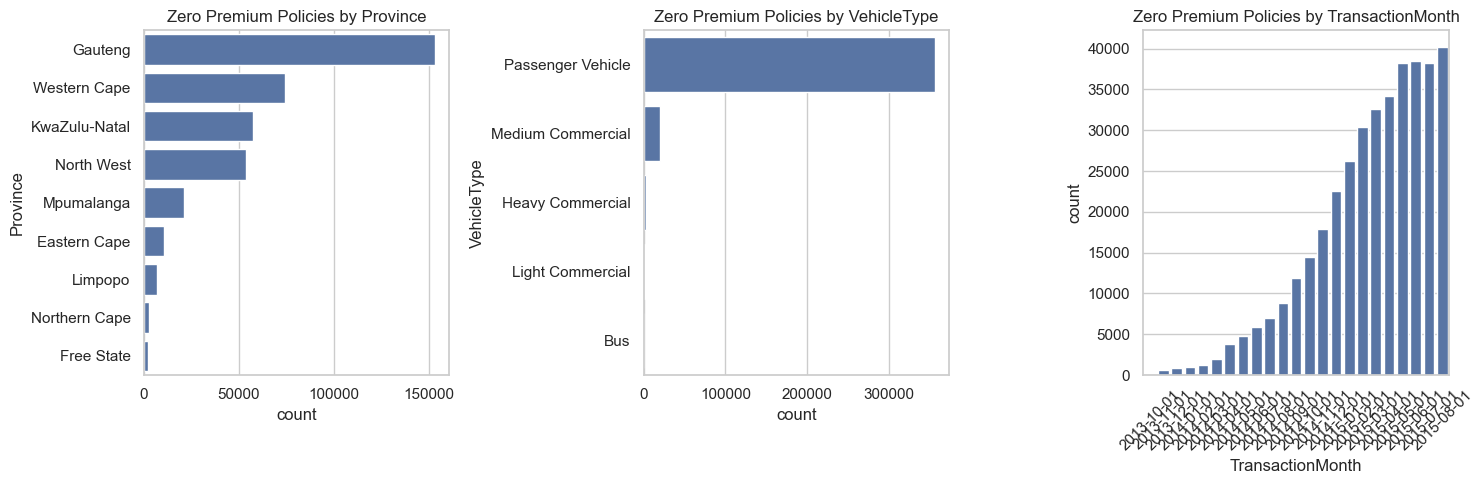

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(y='Province', data=zero_premium_df, order=zero_premium_df['Province'].value_counts().index)
plt.title("Zero Premium Policies by Province")

plt.subplot(1, 3, 2)
sns.countplot(y='VehicleType', data=zero_premium_df, order=zero_premium_df['VehicleType'].value_counts().index)
plt.title("Zero Premium Policies by VehicleType")

plt.subplot(1, 3, 3)
sns.countplot(x='TransactionMonth', data=zero_premium_df, order=sorted(zero_premium_df['TransactionMonth'].unique()))
plt.title("Zero Premium Policies by TransactionMonth")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [38]:
# Filter records where TotalPremium is zero but TotalClaims is non-zero
zero_premium_nonzero_claims = df[(df['TotalPremium'] == 0) & (df['TotalClaims'] != 0)]

print(f"Number of zero-premium but non-zero claims records: {len(zero_premium_nonzero_claims)}")

# Show basic summary stats
print(zero_premium_nonzero_claims[['TotalPremium', 'TotalClaims']].describe())

# Quick peek at first 10 records
zero_premium_nonzero_claims.head(10)


Number of zero-premium but non-zero claims records: 147
       TotalPremium    TotalClaims
count         147.0     147.000000
mean            0.0   19016.594298
std             0.0   26522.458769
min             0.0     228.070175
25%             0.0    2103.478070
50%             0.0    6140.350877
75%             0.0   25249.114035
max             0.0  152589.473684


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
203,46222,4044,2014-10-01,False,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.0,2294.096491
14215,197498,13385,2015-05-01,False,,Individual,Mr,English,Unknown,Unknown,...,Mobility - Windscreen (Feb2015),Windscreen (2015),Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.0,438.596491
16411,135995,10174,2015-03-01,False,,Individual,Mr,English,Unknown,Unknown,...,Mobility - Taxi with value more than R100 000 ...,Own Damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.0,850.000000
25952,212049,19092,2015-05-01,False,,Individual,Mr,English,Unknown,Unknown,...,Mobility - Taxi with value more than R100 000 ...,Own Damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.0,21825.017544
35151,134393,7518,2015-04-01,False,,Individual,Mr,English,Unknown,Unknown,...,No excess,Income Protector,Income Protector,Income Protector,Optional Extended Covers,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.0,6140.350877
35159,134400,7518,2015-04-01,False,,Individual,Mr,English,Unknown,Unknown,...,Mobility - Taxi with value more than R100 000 ...,Own Damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.0,62433.368421
42454,118082,8537,2015-07-01,False,,Individual,Mr,English,ABSA Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.0,1000.000000
45605,212044,19092,2015-05-01,False,,Individual,Mr,English,Unknown,Unknown,...,No excess,Income Protector (2015),Income Protector,Income Protector,Optional Extended Covers,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.0,6140.350877
57375,14980,580,2014-04-01,False,,Individual,Mr,English,ABSA Bank,Current account,...,Mobility - Taxi with value less than R100 000 ...,Own Damage.,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.0,850.000000
77032,118085,8537,2015-04-01,False,,Individual,Mr,English,ABSA Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.0,1650.000000


In [39]:
# Distribution by Province
province_dist = zero_premium_nonzero_claims['Province'].value_counts(normalize=True) * 100
print("Distribution by Province (%):")
print(province_dist)

# Distribution by VehicleType
vehicle_type_dist = zero_premium_nonzero_claims['VehicleType'].value_counts(normalize=True) * 100
print("\nDistribution by VehicleType (%):")
print(vehicle_type_dist)

# Distribution by TransactionMonth
month_dist = zero_premium_nonzero_claims['TransactionMonth'].value_counts(normalize=True) * 100
print("\nDistribution by TransactionMonth (%):")
print(month_dist)


Distribution by Province (%):
Province
Gauteng          53.741497
KwaZulu-Natal    20.408163
North West       10.204082
Western Cape      9.523810
Eastern Cape      2.040816
Mpumalanga        2.040816
Free State        1.360544
Limpopo           0.680272
Name: proportion, dtype: float64

Distribution by VehicleType (%):
VehicleType
Passenger Vehicle    93.197279
Medium Commercial     4.761905
Heavy Commercial      1.360544
Bus                   0.680272
Name: proportion, dtype: float64

Distribution by TransactionMonth (%):
TransactionMonth
2015-01-01    15.646259
2014-11-01    11.564626
2015-03-01     9.523810
2015-04-01     9.523810
2015-02-01     9.523810
2014-12-01     7.482993
2015-05-01     6.802721
2014-04-01     4.761905
2014-03-01     4.081633
2014-09-01     3.401361
2014-05-01     3.401361
2014-10-01     2.721088
2015-07-01     2.721088
2014-08-01     2.721088
2014-06-01     2.040816
2014-02-01     1.360544
2015-06-01     1.360544
2014-07-01     0.680272
2014-01-01     0.6802

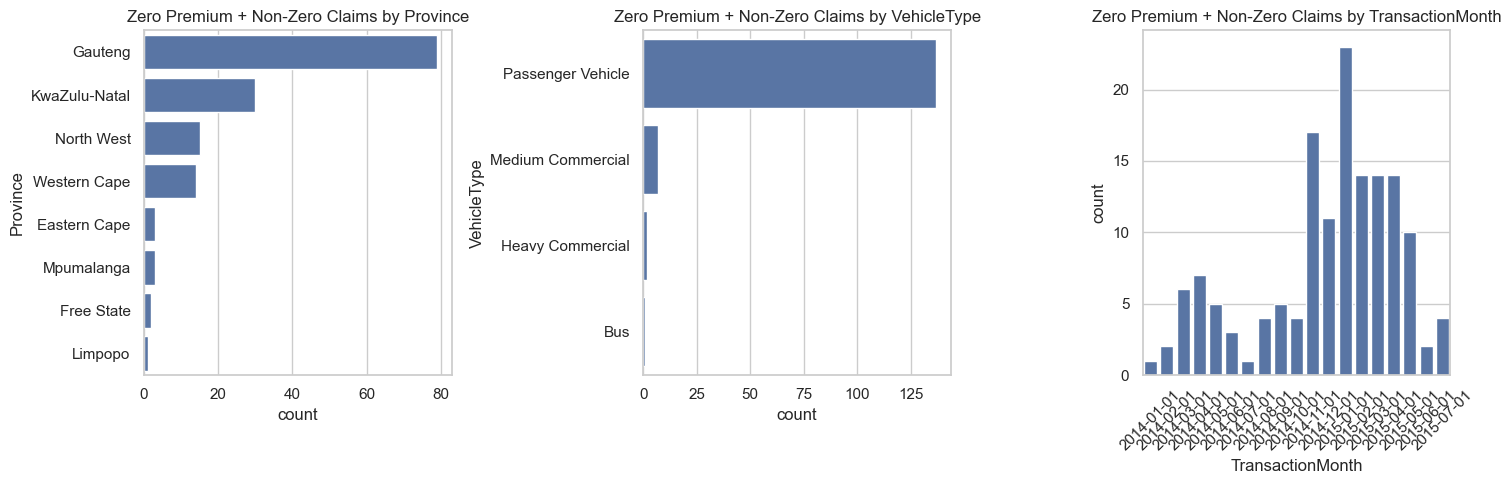

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(y='Province', data=zero_premium_nonzero_claims, order=zero_premium_nonzero_claims['Province'].value_counts().index)
plt.title("Zero Premium + Non-Zero Claims by Province")

plt.subplot(1, 3, 2)
sns.countplot(y='VehicleType', data=zero_premium_nonzero_claims, order=zero_premium_nonzero_claims['VehicleType'].value_counts().index)
plt.title("Zero Premium + Non-Zero Claims by VehicleType")

plt.subplot(1, 3, 3)
sns.countplot(x='TransactionMonth', data=zero_premium_nonzero_claims, order=sorted(zero_premium_nonzero_claims['TransactionMonth'].unique()))
plt.title("Zero Premium + Non-Zero Claims by TransactionMonth")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


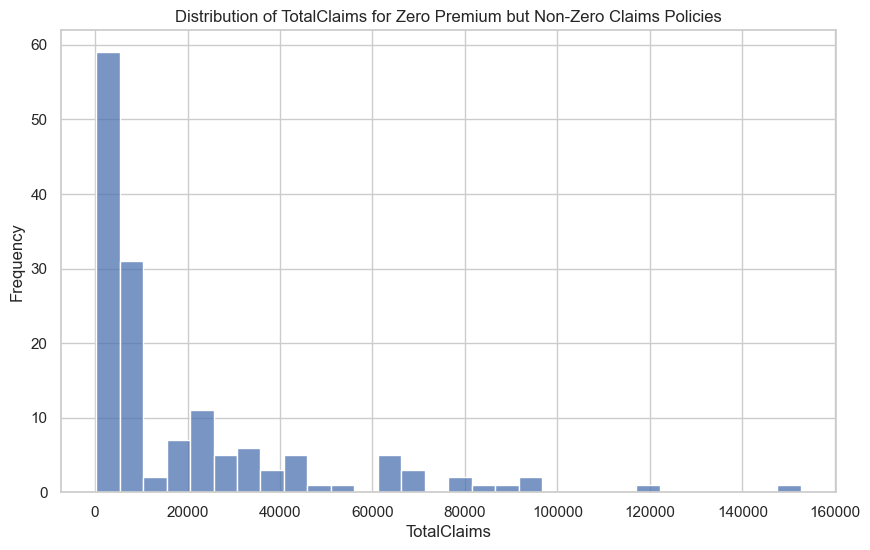

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(zero_premium_nonzero_claims['TotalClaims'], bins=30, kde=False)
plt.title('Distribution of TotalClaims for Zero Premium but Non-Zero Claims Policies')
plt.xlabel('TotalClaims')
plt.ylabel('Frequency')
plt.show()


# 🧠 What We Learned

- **Province:**  
  📍 Most zero-premium policies cluster in  
  - Gauteng (40%)  
  - Western Cape (19%)  
  - KwaZulu-Natal (15%)

- **VehicleType:**  
  🚗 Predominantly Passenger Vehicles (93%), very few commercial vehicles.

- **TransactionMonth:**  
  📅 Zero premiums spread fairly evenly across months, with a slight concentration in mid-2015.

---

# 🔜 Next Steps — Choose one or more to continue:

- 🔎 Analyze zero-claims policies similarly:  
  Check if they also cluster by **Province**, **VehicleType**, and **TransactionMonth**.

- 🧐 Investigate the 147 zero-premium but non-zero claims records:  
  Are these data errors or meaningful exceptions?

- 🔄 Bivariate analysis:  
  Explore relationships between categorical features and numeric ones like **TotalPremium** or **TotalClaims**.

- 🚨 Outlier analysis:  
  Look at very high claim values by **Province** or **VehicleType**.


Total zero-claim policies: 997017
        TotalPremium  TotalClaims
count  997017.000000     997017.0
mean       60.852276          0.0
std       172.577024          0.0
min         0.000000          0.0
25%         0.000000          0.0
50%         2.174825          0.0
75%        21.929825          0.0
max     65282.603421          0.0

Distribution of zero-claim policies by Province:
Province
Gauteng          39.369439
Western Cape     17.091785
KwaZulu-Natal    16.955779
North West       14.336566
Mpumalanga        5.274534
Eastern Cape      3.037260
Limpopo           2.484311
Free State        0.811220
Northern Cape     0.639106
Name: proportion, dtype: float64

Distribution of zero-claim policies by VehicleType:
VehicleType
Passenger Vehicle    93.400971
Medium Commercial     5.401513
Heavy Commercial      0.740607
Light Commercial      0.390274
Bus                   0.066635
Name: proportion, dtype: float64

Distribution of zero-claim policies by Gender:
Gender
Not specified    

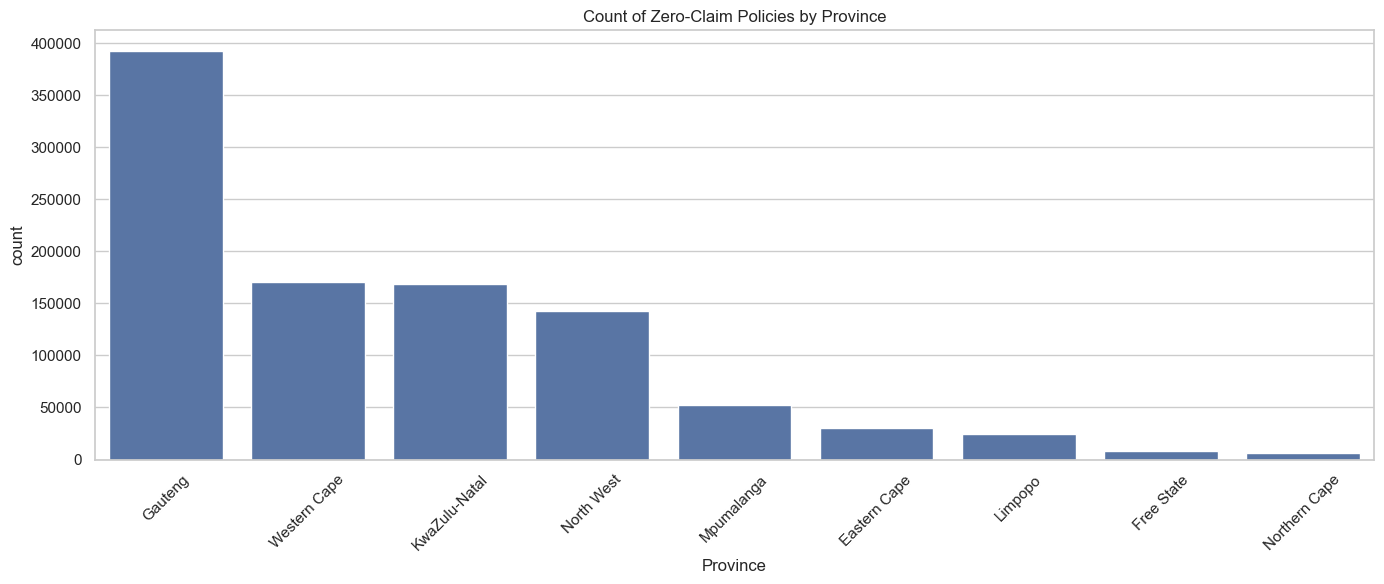

In [42]:
# Cell: Analyze zero-claim policies
zero_claims = df[df['TotalClaims'] == 0]

# Basic stats on zero-claim policies
print(f"Total zero-claim policies: {len(zero_claims)}")

# Summary stats for zero-claim policies
print(zero_claims[['TotalPremium', 'TotalClaims']].describe())

# Distribution of zero-claim policies by categorical features
categorical_cols = ['Province', 'VehicleType', 'Gender']

for col in categorical_cols:
    print(f"\nDistribution of zero-claim policies by {col}:")
    print(zero_claims[col].value_counts(normalize=True) * 100)  # percentages

# Visualize counts for zero-claim policies by Province
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.countplot(data=zero_claims, x='Province', order=zero_claims['Province'].value_counts().index)
plt.title('Count of Zero-Claim Policies by Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


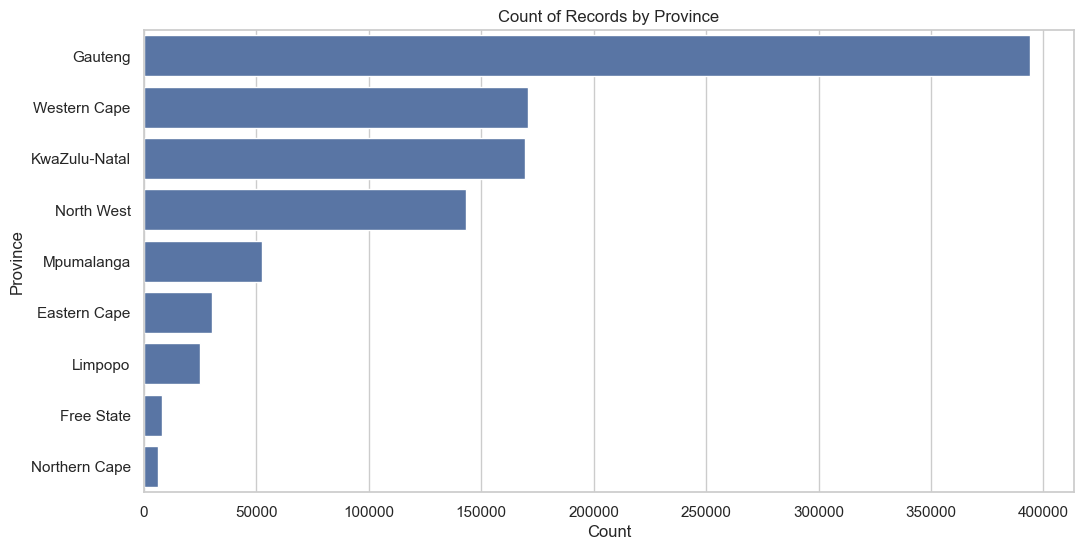

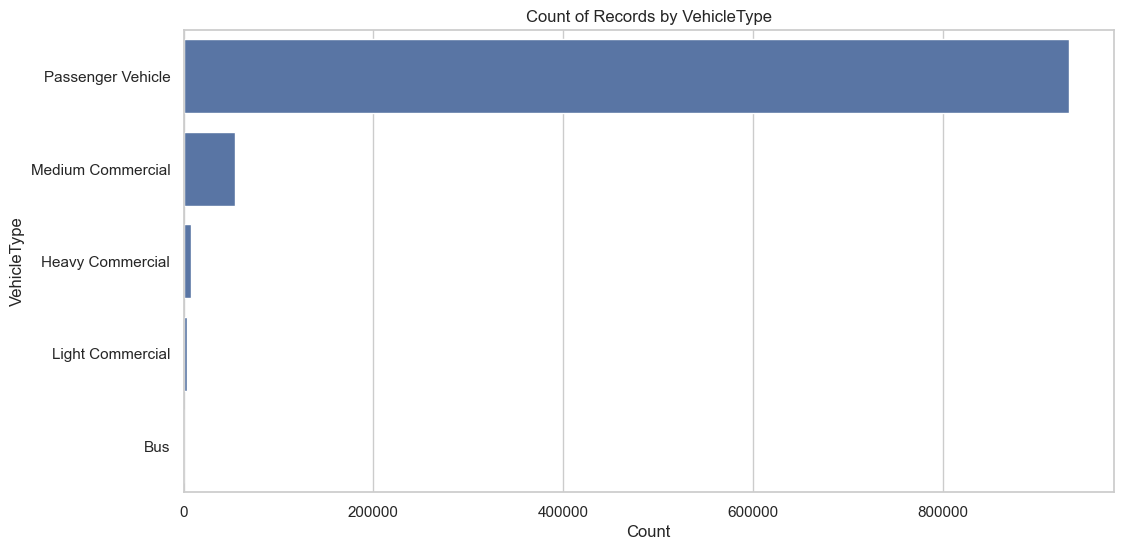

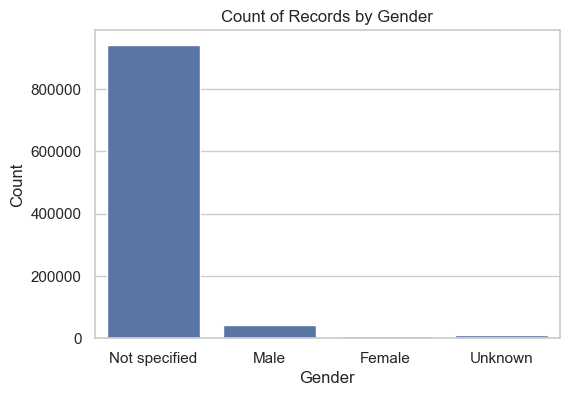

In [24]:
# Province counts
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Province', order=df['Province'].value_counts().index)
plt.title('Count of Records by Province')
plt.xlabel('Count')
plt.ylabel('Province')
plt.show()

# VehicleType counts
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='VehicleType', order=df['VehicleType'].value_counts().index)
plt.title('Count of Records by VehicleType')
plt.xlabel('Count')
plt.ylabel('VehicleType')
plt.show()

# Gender counts
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Count of Records by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


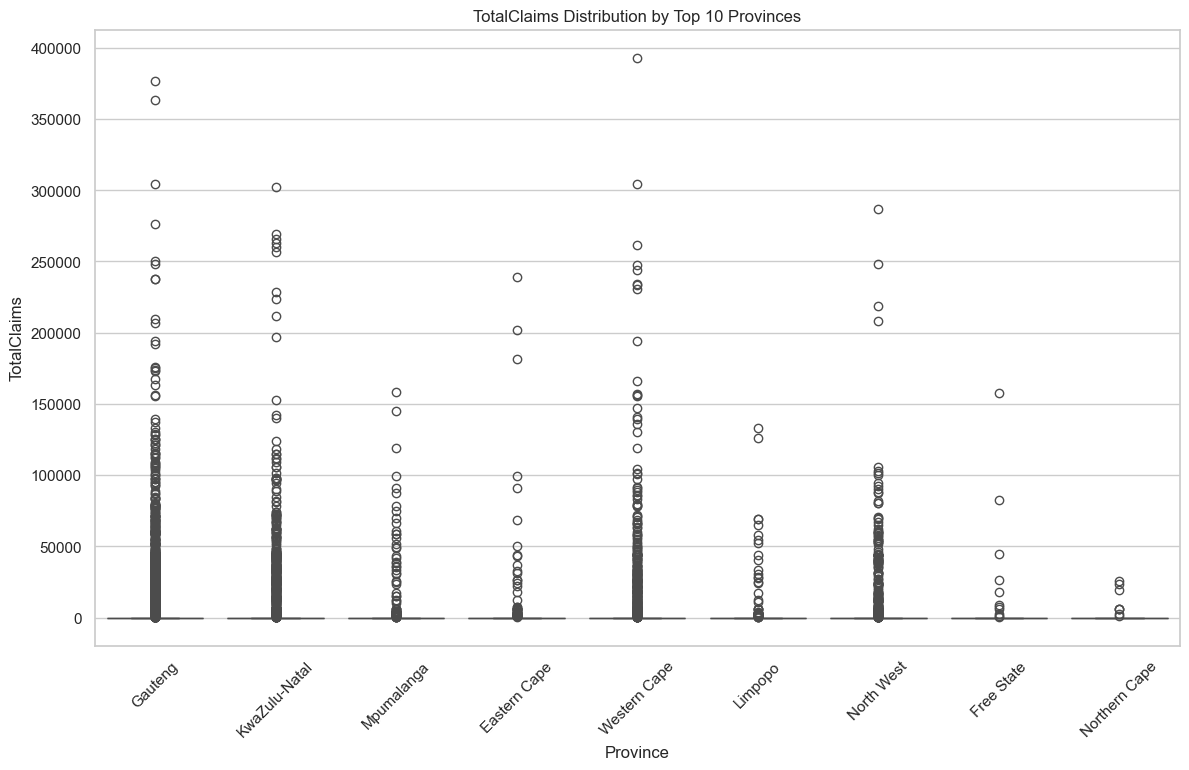

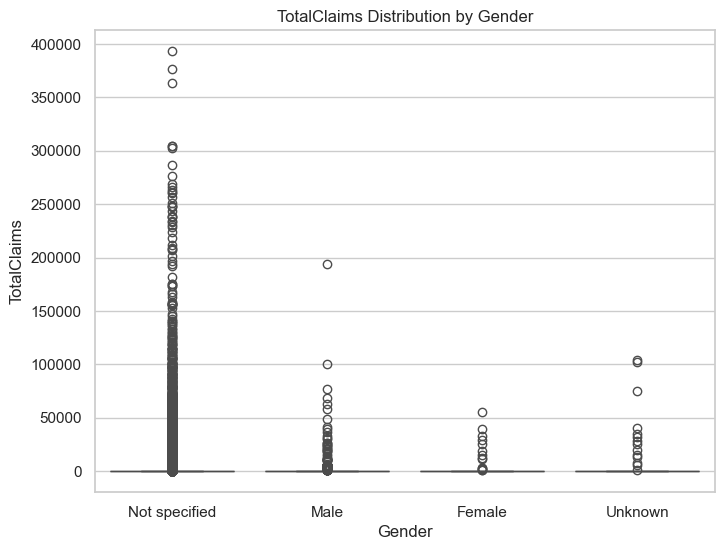

In [26]:
# Boxplot TotalClaims by Province (limit to top 10 provinces for readability)
top_provinces = df['Province'].value_counts().nlargest(10).index
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['Province'].isin(top_provinces)], x='Province', y='TotalClaims')
plt.title('TotalClaims Distribution by Top 10 Provinces')
plt.xticks(rotation=45)
plt.show()

# Boxplot TotalClaims by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='TotalClaims')
plt.title('TotalClaims Distribution by Gender')
plt.show()


In [29]:
# Create plots directory if it doesn't exist
os.makedirs('plots', exist_ok=True)

# Save one histogram example
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPremium'], bins=50, kde=True)
plt.title('Distribution of TotalPremium')
plt.xlabel('TotalPremium')
plt.ylabel('Frequency')
plt.savefig('plots/totalpremium_histogram.png')
plt.close()

# Save one boxplot example
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['Province'].isin(top_provinces)], x='Province', y='TotalClaims')
plt.title('TotalClaims Distribution by Top 10 Provinces')
plt.xticks(rotation=45)
plt.savefig('plots/totalclaims_boxplot_province.png')
plt.close()

# Save one trendline example - Claims over months
# Convert TransactionMonth to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
claims_by_month = df.groupby('TransactionMonth')['TotalClaims'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=claims_by_month, x='TransactionMonth', y='TotalClaims')
plt.title('Total Claims Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Total Claims')
plt.savefig('plots/totalclaims_over_time.png')
plt.close()


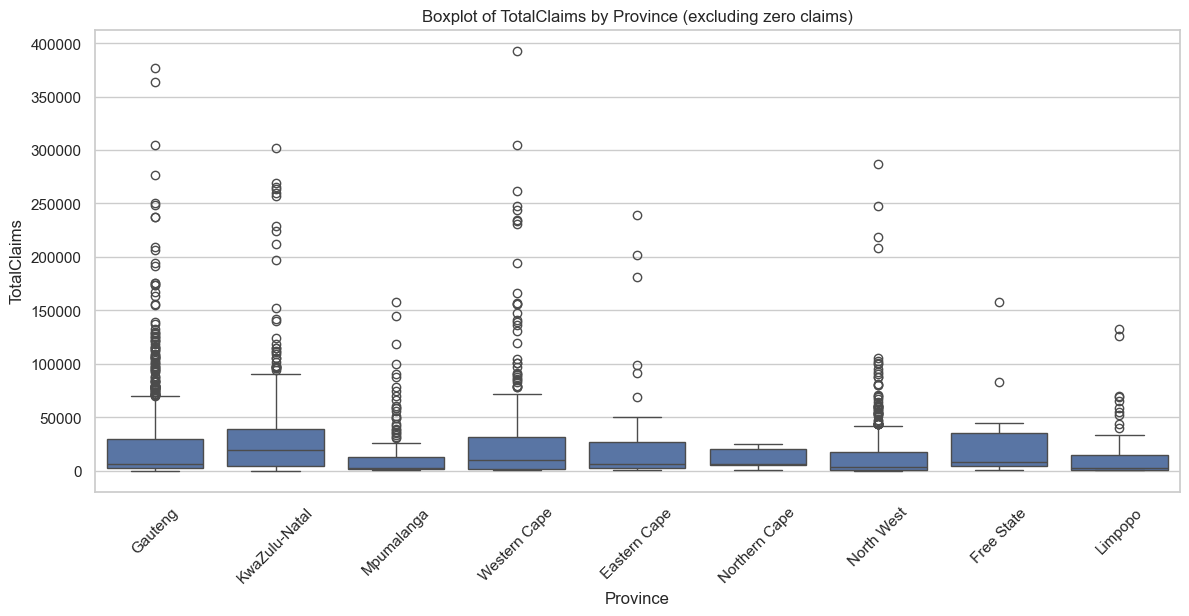

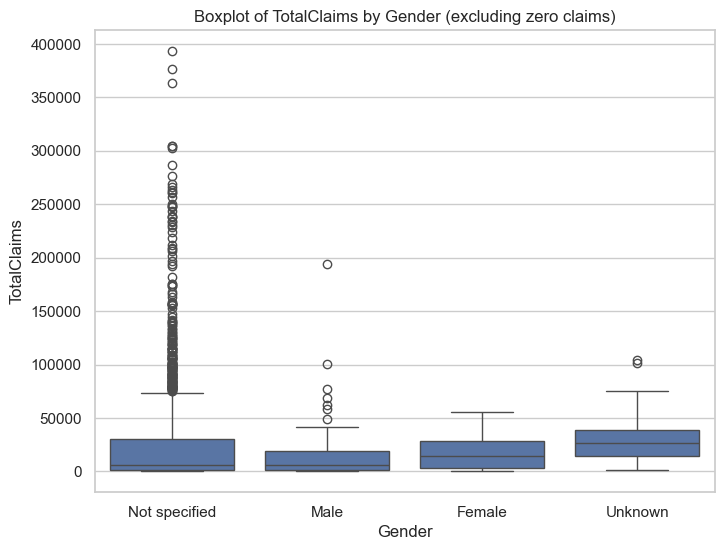

In [35]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Province', y='TotalClaims', data=df[df['TotalClaims'] > 0])
plt.xticks(rotation=45)
plt.title('Boxplot of TotalClaims by Province (excluding zero claims)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='TotalClaims', data=df[df['TotalClaims'] > 0])
plt.title('Boxplot of TotalClaims by Gender (excluding zero claims)')
plt.show()


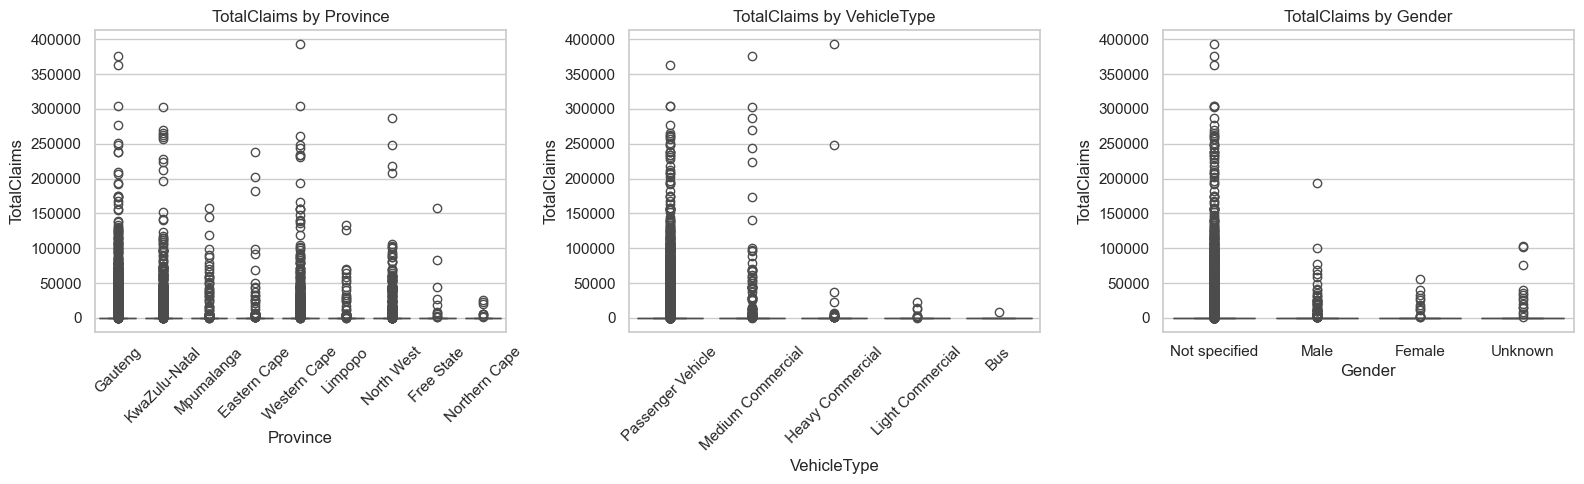

In [43]:
# Bivariate analysis with boxplots for TotalClaims by Province, VehicleType, Gender

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(data=df, x='Province', y='TotalClaims')
plt.title('TotalClaims by Province')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.boxplot(data=df, x='VehicleType', y='TotalClaims')
plt.title('TotalClaims by VehicleType')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.boxplot(data=df, x='Gender', y='TotalClaims')
plt.title('TotalClaims by Gender')

plt.tight_layout()
plt.show()


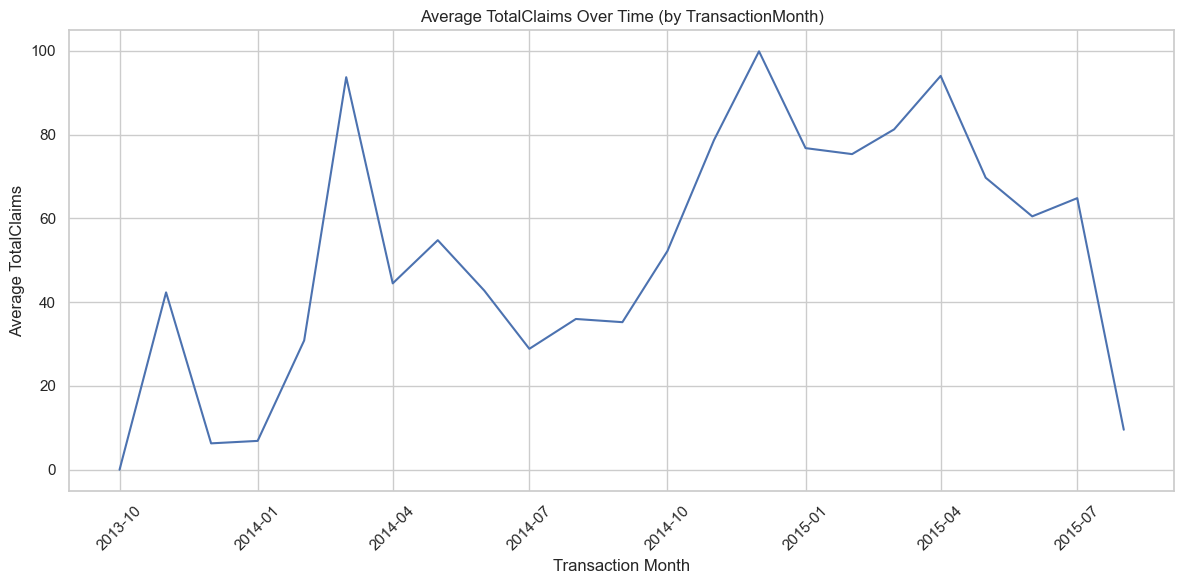

In [44]:
#  Temporal trends in TotalClaims by TransactionMonth

# Convert TransactionMonth to datetime for sorting
df['TransactionMonth_dt'] = pd.to_datetime(df['TransactionMonth'], format='%Y-%m')

# Aggregate mean TotalClaims per month
monthly_claims = df.groupby('TransactionMonth_dt')['TotalClaims'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_claims, x='TransactionMonth_dt', y='TotalClaims')
plt.title('Average TotalClaims Over Time (by TransactionMonth)')
plt.xlabel('Transaction Month')
plt.ylabel('Average TotalClaims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
# Cell: Save key plots to 'plots/' directory and summarize insights

import os

# Ensure 'plots' directory exists
os.makedirs('plots', exist_ok=True)

# Plot 1: Distribution of zero-claim policies by Province
plt.figure(figsize=(14,6))
sns.countplot(data=zero_claims, x='Province', order=zero_claims['Province'].value_counts().index)
plt.title('Count of Zero-Claim Policies by Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/zero_claims_by_province.png')
plt.close()

# Plot 2: Boxplot of TotalClaims by VehicleType
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='VehicleType', y='TotalClaims')
plt.title('TotalClaims by VehicleType')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/total_claims_by_vehicle_type.png')
plt.close()

# Plot 3: Temporal trend of average TotalClaims
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_claims, x='TransactionMonth_dt', y='TotalClaims')
plt.title('Average TotalClaims Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Average TotalClaims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/average_total_claims_over_time.png')
plt.close()

print("Saved 3 key visualizations in 'plots/' directory.")

# Summary insights
insights = """
- A large portion of policies have zero claims, mostly concentrated in specific provinces.
- Vehicle type affects claim amounts, with some types showing higher variability.
- There are observable trends in claims over time, useful for forecasting.
"""

print(insights)


Saved 3 key visualizations in 'plots/' directory.

- A large portion of policies have zero claims, mostly concentrated in specific provinces.
- Vehicle type affects claim amounts, with some types showing higher variability.
- There are observable trends in claims over time, useful for forecasting.



In [48]:
print(df.dtypes)

# Convert date column if needed (optional, since it's already datetime)
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Convert categorical variables to 'category' dtype
categorical_cols = ['Province', 'Gender', 'VehicleType', 'PostalCode']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Check missing values
print(df.isnull().sum())


UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                               object
Cylinders  

C:\Users\helin\AppData\Local\Temp\ipykernel_18308\185055027.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_claim_freq = df.groupby('YearMonth').apply(lambda x: (x['TotalClaims'] > 0).mean())


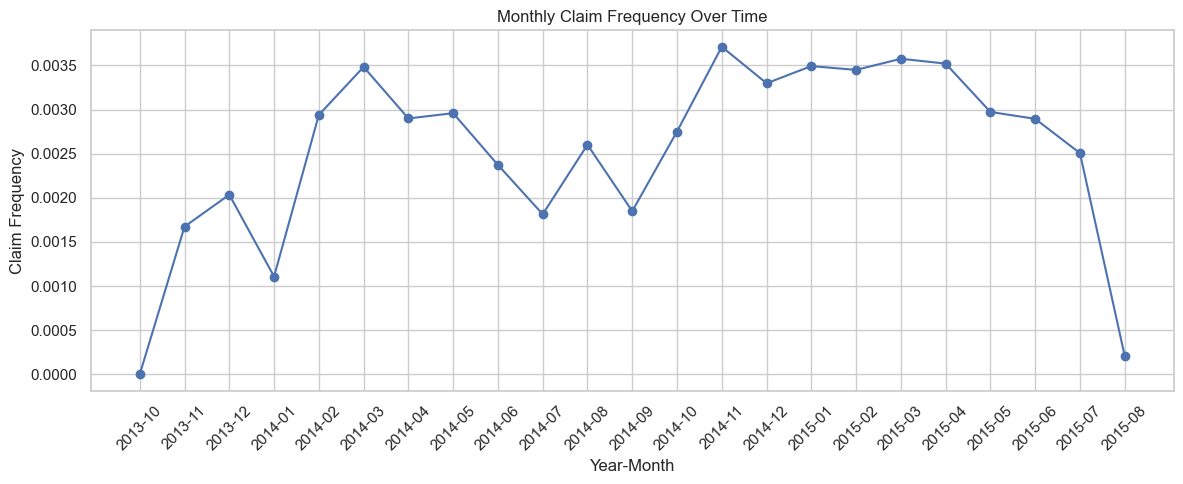

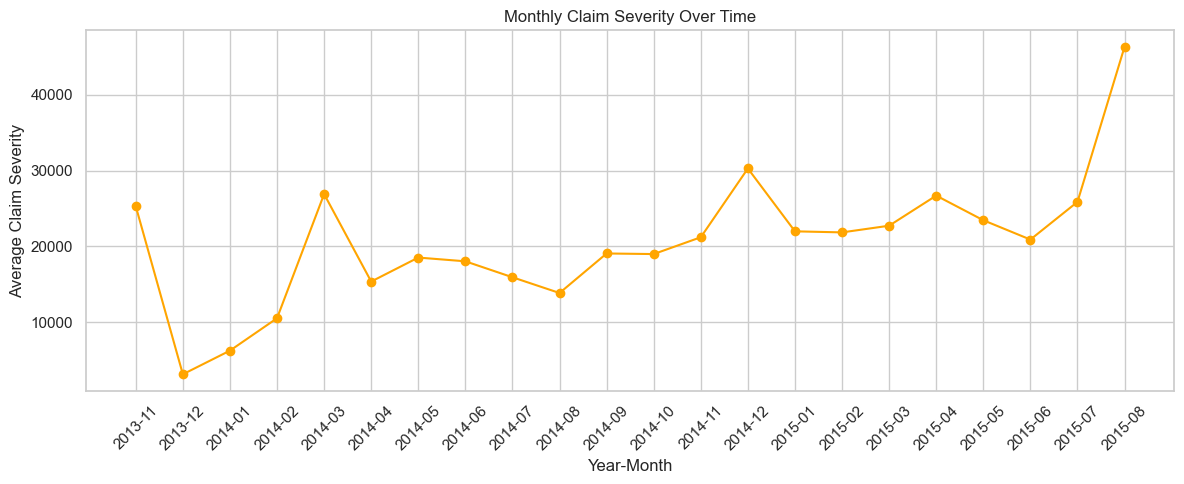

In [50]:
# Create a month-year column using TransactionMonth
df['YearMonth'] = df['TransactionMonth'].dt.to_period('M')

# Claim frequency: proportion of policies with claims > 0 per month
monthly_claim_freq = df.groupby('YearMonth').apply(lambda x: (x['TotalClaims'] > 0).mean())

# Claim severity: average claim amount among claims > 0 per month
monthly_claim_severity = df[df['TotalClaims'] > 0].groupby('YearMonth')['TotalClaims'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_claim_freq.index.astype(str), monthly_claim_freq.values, marker='o')
plt.title('Monthly Claim Frequency Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Claim Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(monthly_claim_severity.index.astype(str), monthly_claim_severity.values, color='orange', marker='o')
plt.title('Monthly Claim Severity Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Claim Severity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


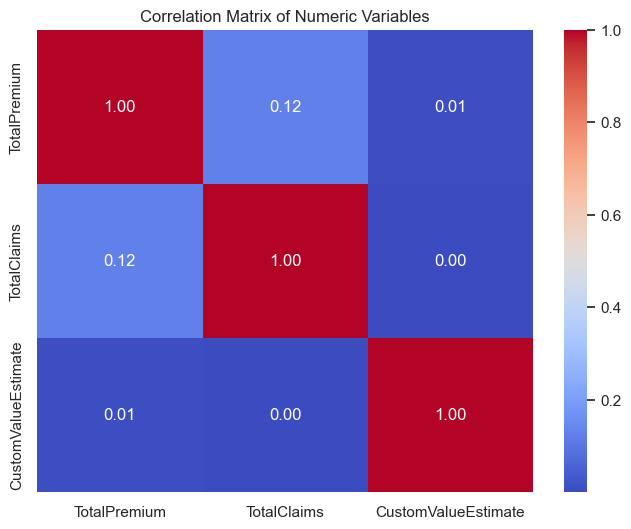

In [51]:
import seaborn as sns

numeric_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']  # add any others you want
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


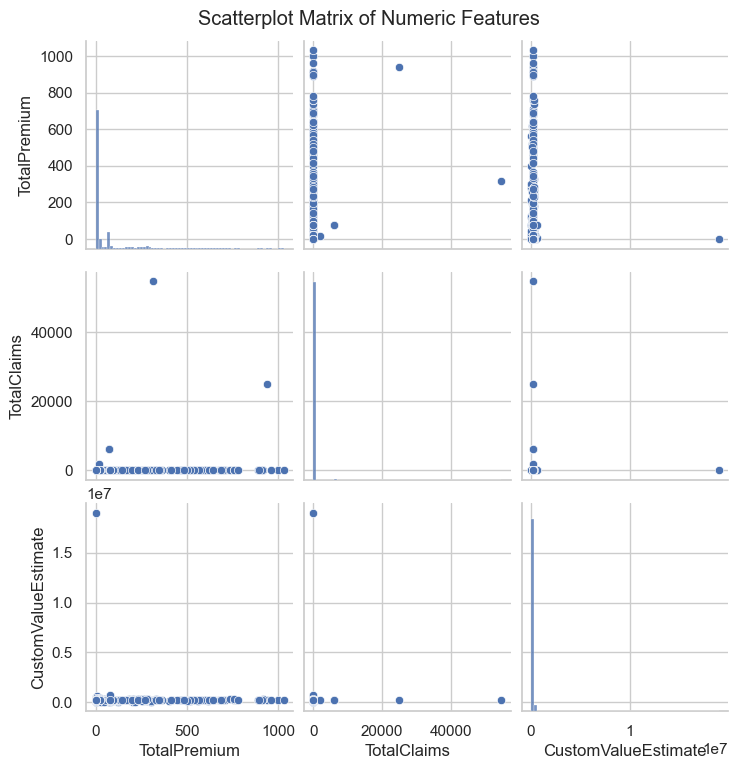

In [52]:
sns.pairplot(df[numeric_cols].sample(1000))  # sample for performance
plt.suptitle('Scatterplot Matrix of Numeric Features', y=1.02)
plt.show()


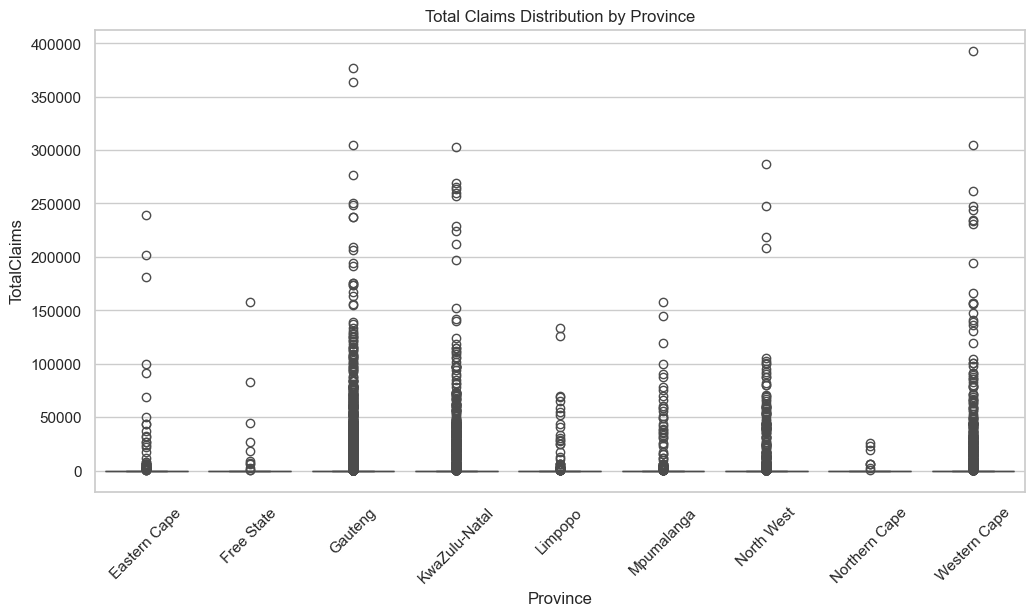

C:\Users\helin\AppData\Local\Temp\ipykernel_18308\1335323839.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  claim_freq_by_vehicle = df.groupby('VehicleType').apply(lambda x: (x['TotalClaims'] > 0).mean())
C:\Users\helin\AppData\Local\Temp\ipykernel_18308\1335323839.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  claim_freq_by_vehicle = df.groupby('VehicleType').apply(lambda x: (x['TotalClaims'] > 0).mean())


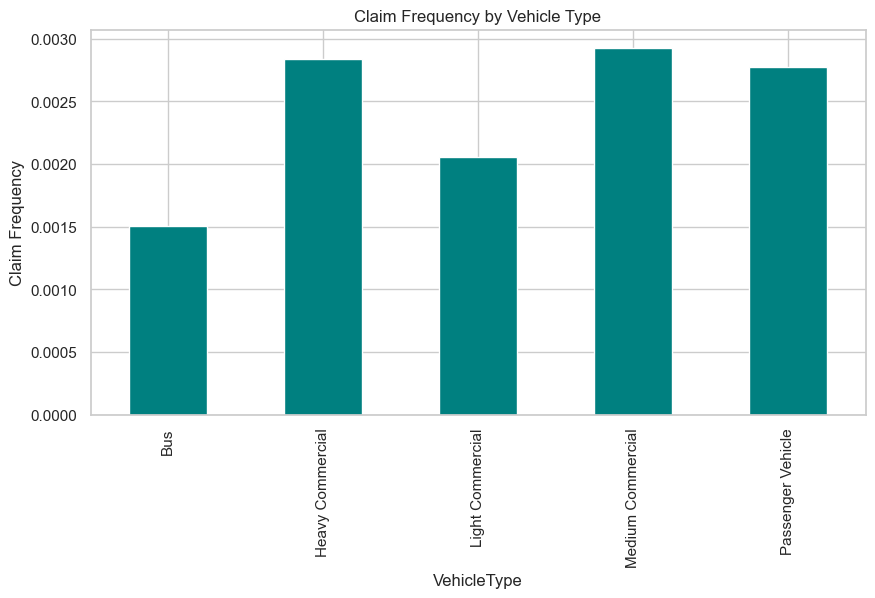

C:\Users\helin\AppData\Local\Temp\ipykernel_18308\1335323839.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  claim_severity_gender = df[df['TotalClaims'] > 0].groupby('Gender')['TotalClaims'].mean()


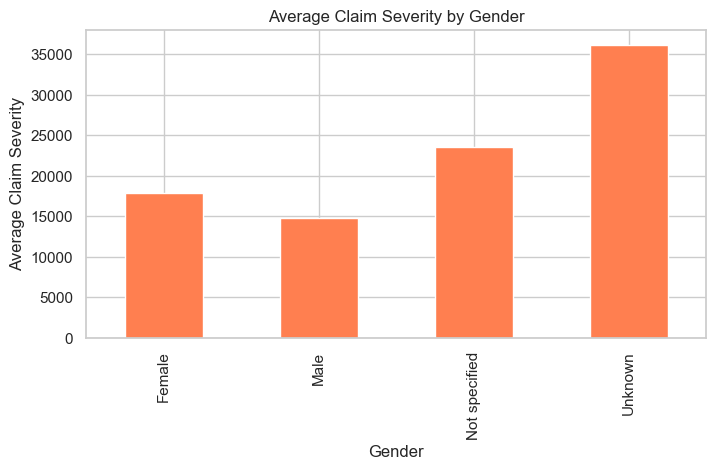

In [53]:
# Boxplot: TotalClaims by Province
plt.figure(figsize=(12,6))
sns.boxplot(x='Province', y='TotalClaims', data=df)
plt.title('Total Claims Distribution by Province')
plt.xticks(rotation=45)
plt.show()

# Bar plot: Claim frequency by VehicleType
claim_freq_by_vehicle = df.groupby('VehicleType').apply(lambda x: (x['TotalClaims'] > 0).mean())
claim_freq_by_vehicle.plot(kind='bar', figsize=(10,5), color='teal')
plt.title('Claim Frequency by Vehicle Type')
plt.ylabel('Claim Frequency')
plt.show()

# Claim severity by Gender
claim_severity_gender = df[df['TotalClaims'] > 0].groupby('Gender')['TotalClaims'].mean()
claim_severity_gender.plot(kind='bar', figsize=(8,4), color='coral')
plt.title('Average Claim Severity by Gender')
plt.ylabel('Average Claim Severity')
plt.show()


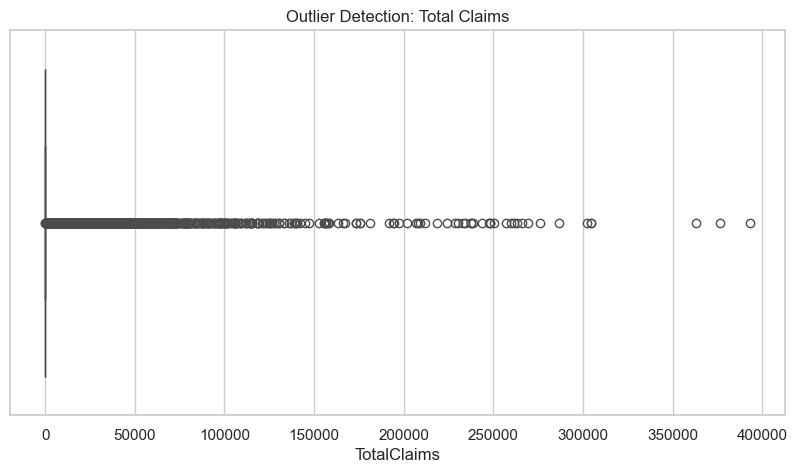

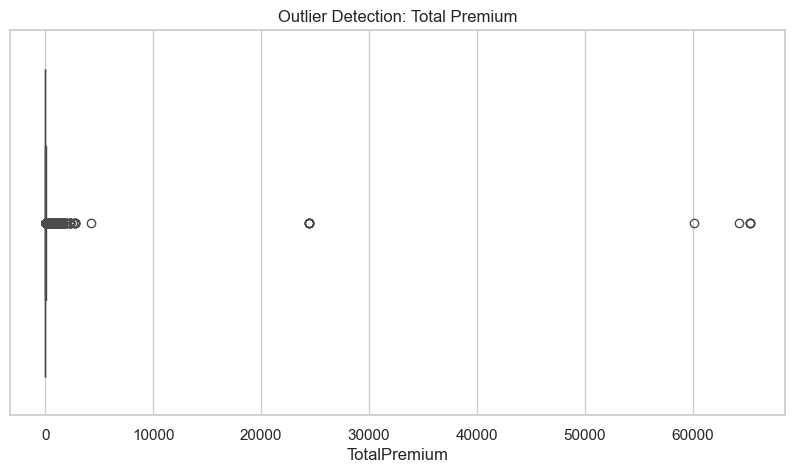

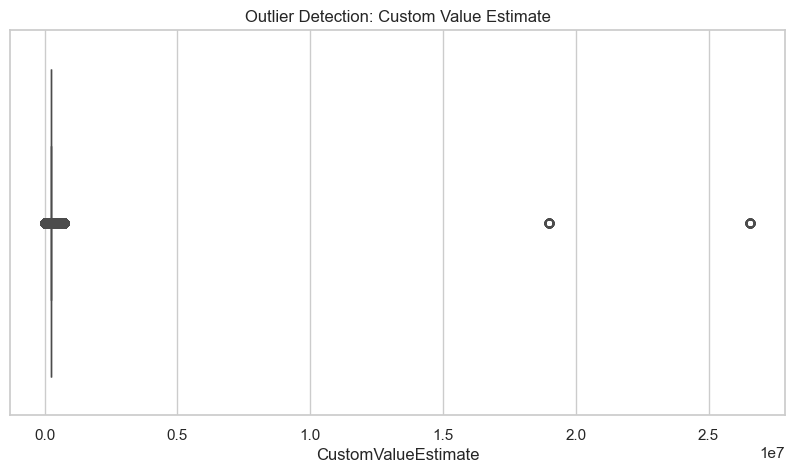

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['TotalClaims'])
plt.title('Outlier Detection: Total Claims')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['TotalPremium'])
plt.title('Outlier Detection: Total Premium')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['CustomValueEstimate'])
plt.title('Outlier Detection: Custom Value Estimate')
plt.show()


C:\Users\helin\AppData\Local\Temp\ipykernel_18308\117612266.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_ratio_province = df.groupby('Province')['LossRatio'].mean().sort_values(ascending=False)


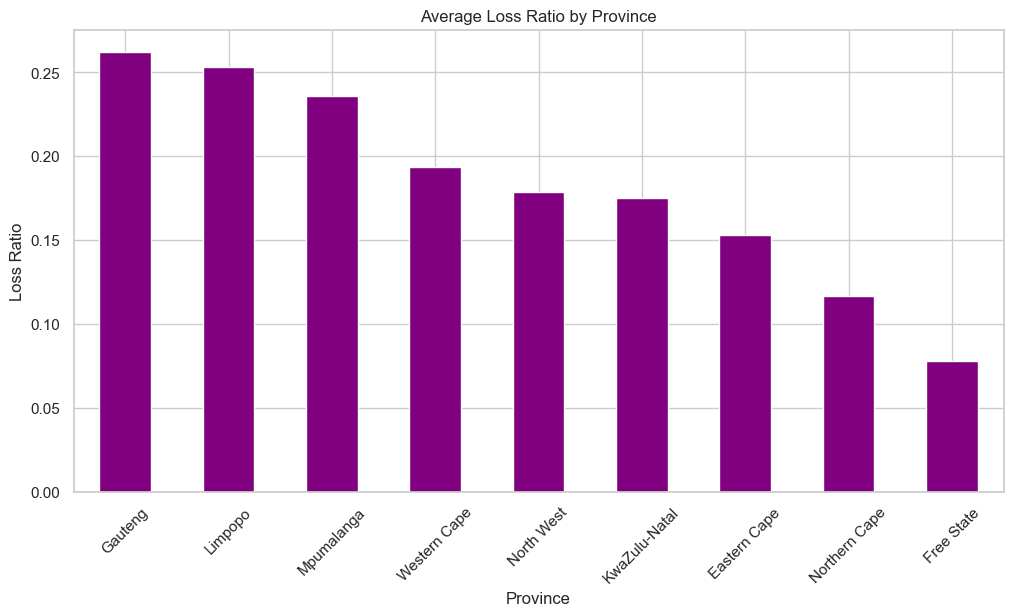

In [55]:
# Calculate Loss Ratio safely (avoid division by zero)
df['LossRatio'] = df.apply(lambda row: row['TotalClaims']/row['TotalPremium'] if row['TotalPremium'] > 0 else 0, axis=1)

loss_ratio_province = df.groupby('Province')['LossRatio'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
loss_ratio_province.plot(kind='bar', color='purple')
plt.title('Average Loss Ratio by Province')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=45)
plt.show()


In [57]:
# Calculate overall loss ratio (exclude rows where TotalPremium is zero or missing to avoid division errors)
valid_df = df[(df['TotalPremium'] > 0) & (~df['TotalClaims'].isnull())]
overall_loss_ratio = valid_df['TotalClaims'].sum() / valid_df['TotalPremium'].sum()
print(f"Overall Loss Ratio: {overall_loss_ratio:.2%}")


Overall Loss Ratio: 100.24%


In [58]:
# Group by each categorical variable and calculate loss ratio
for col in ['Province', 'VehicleType', 'Gender']:
    group_loss_ratio = valid_df.groupby(col).apply(
        lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum()
    ).sort_values(ascending=False)
    print(f"\nLoss Ratio by {col}:\n", group_loss_ratio)


C:\Users\helin\AppData\Local\Temp\ipykernel_18308\1663608543.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_loss_ratio = valid_df.groupby(col).apply(
C:\Users\helin\AppData\Local\Temp\ipykernel_18308\1663608543.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_loss_ratio = valid_df.groupby(col).apply(
C:\Users\helin\AppData\Local\Temp\ipykernel_18308\1663608543.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observ


Loss Ratio by Province:
 Province
Gauteng          1.163757
Western Cape     1.044693
KwaZulu-Natal    1.021953
North West       0.746775
Mpumalanga       0.717765
Limpopo          0.645207
Eastern Cape     0.629027
Free State       0.510153
Northern Cape    0.282699
dtype: float64


C:\Users\helin\AppData\Local\Temp\ipykernel_18308\1663608543.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_loss_ratio = valid_df.groupby(col).apply(
C:\Users\helin\AppData\Local\Temp\ipykernel_18308\1663608543.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_loss_ratio = valid_df.groupby(col).apply(



Loss Ratio by VehicleType:
 VehicleType
Heavy Commercial     1.612422
Medium Commercial    1.027881
Passenger Vehicle    1.000458
Light Commercial     0.232066
Bus                  0.000000
dtype: float64

Loss Ratio by Gender:
 Gender
Not specified    1.014989
Female           0.812129
Male             0.773623
Unknown          0.614537
dtype: float64


C:\Users\helin\AppData\Local\Temp\ipykernel_18308\1663608543.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_loss_ratio = valid_df.groupby(col).apply(


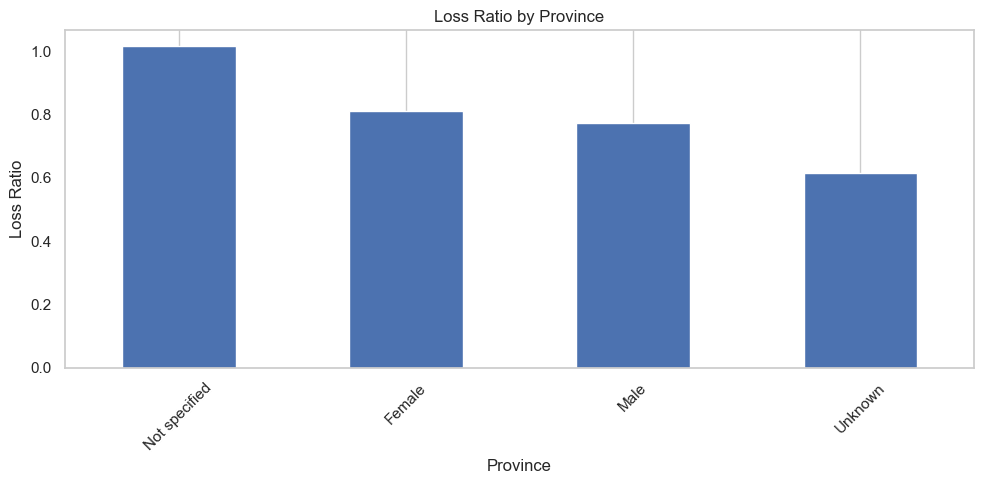

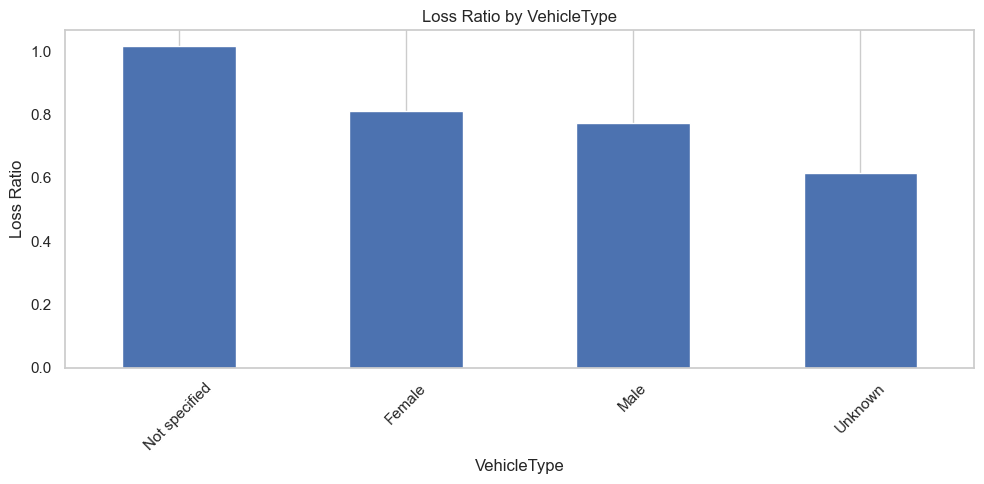

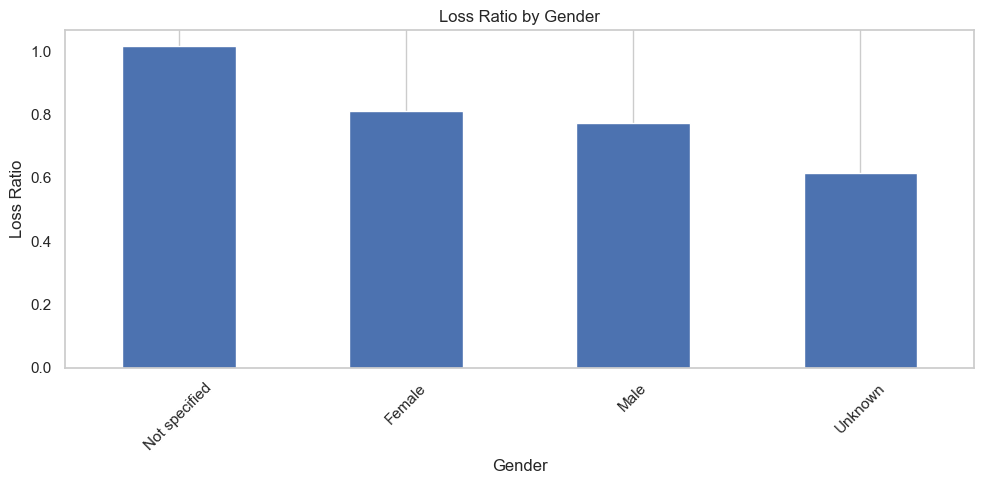

In [59]:
import matplotlib.pyplot as plt

for col in ['Province', 'VehicleType', 'Gender']:
    plt.figure(figsize=(10, 5))
    group_loss_ratio.plot(kind='bar')
    plt.title(f'Loss Ratio by {col}')
    plt.ylabel('Loss Ratio')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


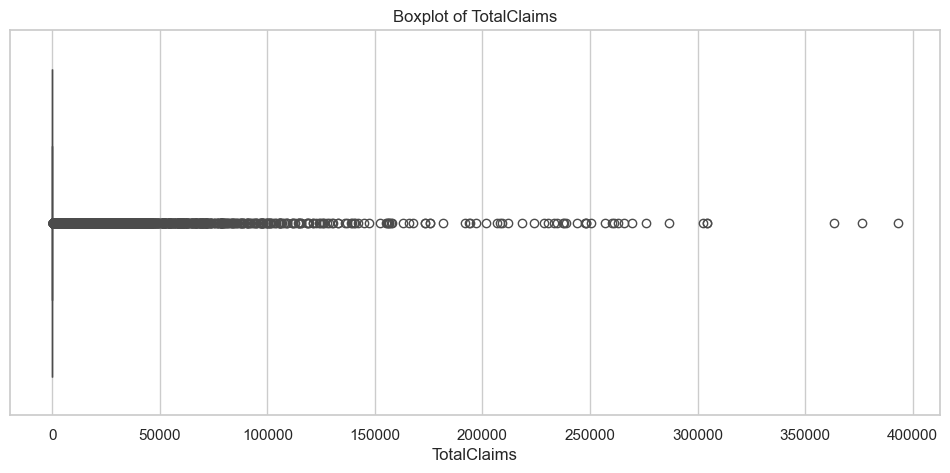

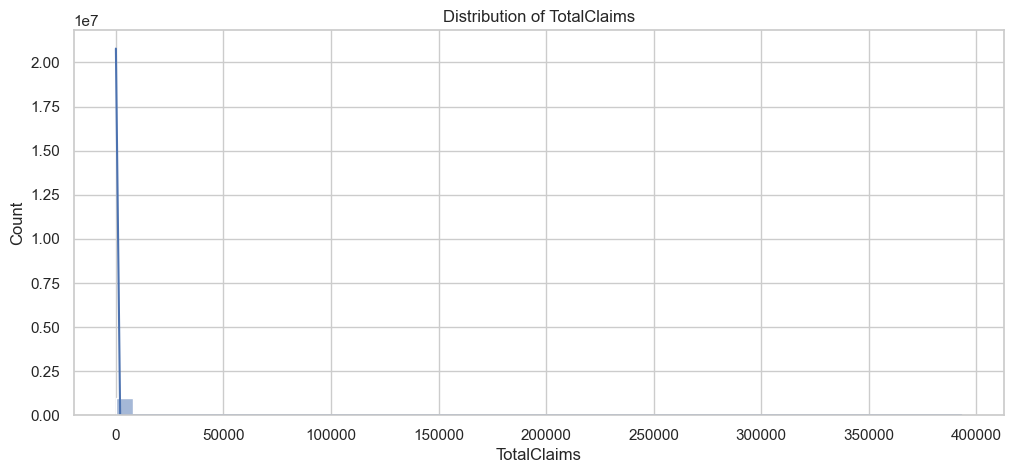

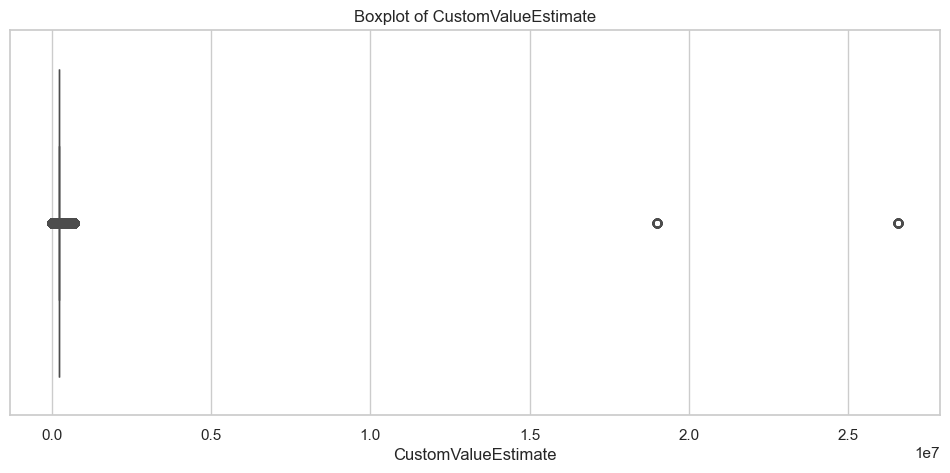

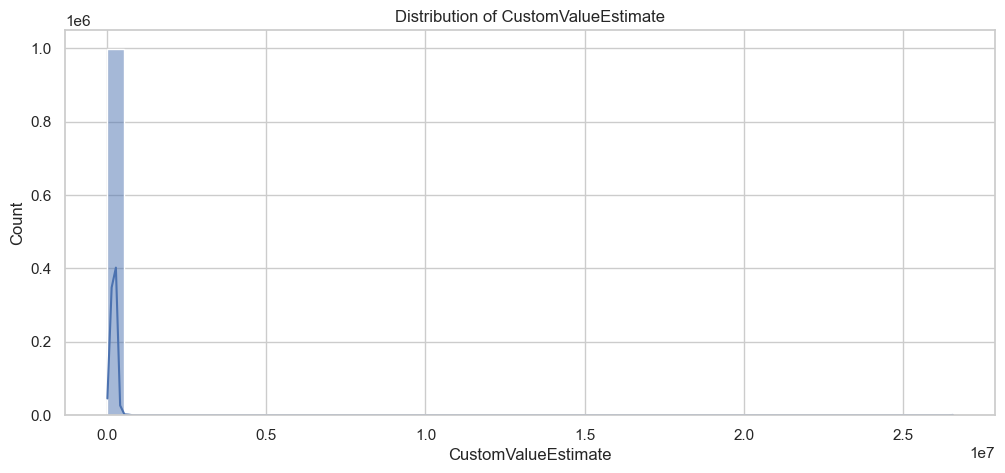

In [60]:
import seaborn as sns

# Variables to check
vars_to_check = ['TotalClaims', 'CustomValueEstimate']

for var in vars_to_check:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()

    plt.figure(figsize=(12, 5))
    sns.histplot(df[var], bins=50, kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()


In [61]:
for var in vars_to_check:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    print(f"{var} outliers count: {len(outliers)}")


TotalClaims outliers count: 2788
CustomValueEstimate outliers count: 217868


C:\Users\helin\AppData\Local\Temp\ipykernel_18308\365806172.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_claim_freq = df.groupby('YearMonth').apply(lambda x: (x['TotalClaims'] > 0).mean())


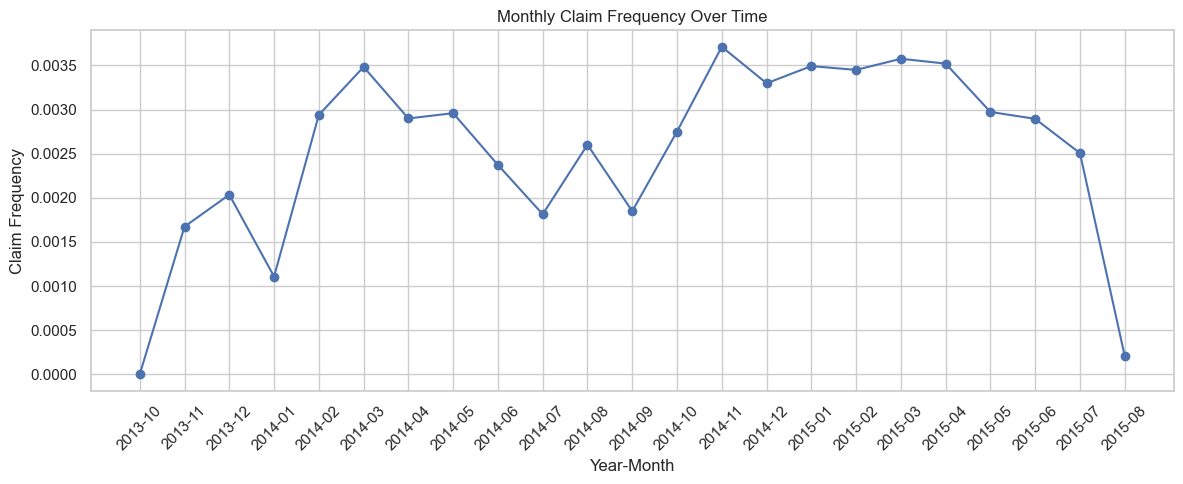

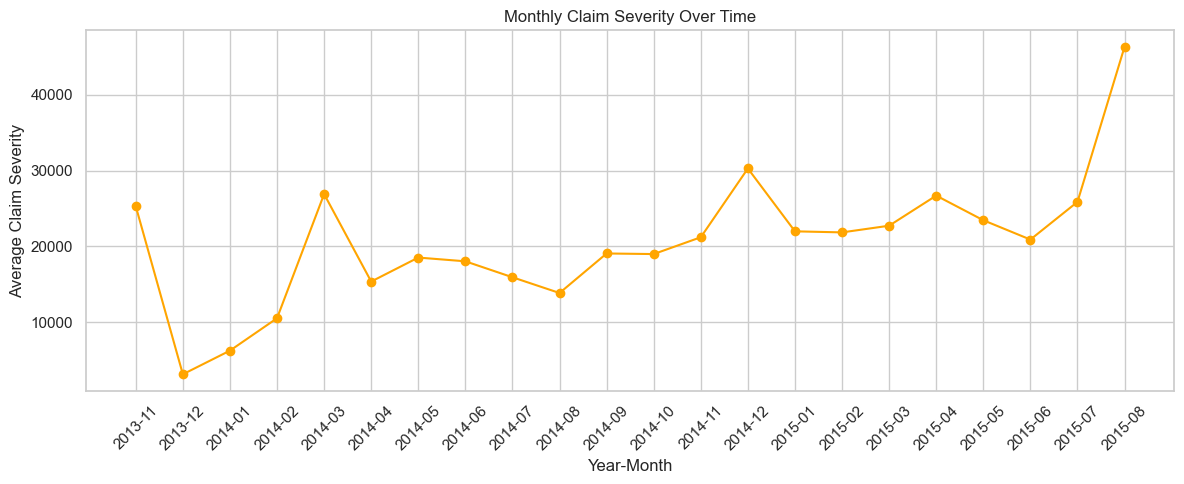

In [62]:
# Create month-year if not already created
df['YearMonth'] = pd.to_datetime(df['TransactionMonth']).dt.to_period('M')

# Claim frequency per month
monthly_claim_freq = df.groupby('YearMonth').apply(lambda x: (x['TotalClaims'] > 0).mean())

# Claim severity per month (average claims > 0)
monthly_claim_severity = df[df['TotalClaims'] > 0].groupby('YearMonth')['TotalClaims'].mean()

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(monthly_claim_freq.index.astype(str), monthly_claim_freq.values, marker='o')
plt.title('Monthly Claim Frequency Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Claim Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(monthly_claim_severity.index.astype(str), monthly_claim_severity.values, color='orange', marker='o')
plt.title('Monthly Claim Severity Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Claim Severity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
# Aggregate claim amounts by Make and Model
make_model_claims = df.groupby(['make', 'Model']).agg(
    avg_claim_amount=('TotalClaims', 'mean'),
    claim_count=('TotalClaims', 'count')
).reset_index()

# Filter for make/models with enough claims (e.g., at least 10 claims) to avoid noise
make_model_claims_filtered = make_model_claims[make_model_claims['claim_count'] >= 10]

# Sort descending for highest claims
top_high_claims = make_model_claims_filtered.sort_values(by='avg_claim_amount', ascending=False).head(10)
print("Top 10 Vehicle Make/Models with Highest Average Claims:")
print(top_high_claims)

# Sort ascending for lowest claims
top_low_claims = make_model_claims_filtered.sort_values(by='avg_claim_amount', ascending=True).head(10)
print("\nTop 10 Vehicle Make/Models with Lowest Average Claims:")
print(top_low_claims)


Top 10 Vehicle Make/Models with Highest Average Claims:
                                    make                        Model  \
311                               TOYOTA  L/CRUISER FJ 4.0 V6 CRUISER   
83                               HYUNDAI       H-1 2.5 CRDI WAGON A/T   
53                                  FIAT       DUCATO 2.3 JTD VETRATO   
394                           VOLKSWAGEN            POLO VIVO 1.6 5Dr   
130                        MERCEDES-BENZ                C180 BE COUPE   
162                        MERCEDES-BENZ        SPRINTER 312D F/C P/V   
246  SUZUKI                                             ERTIGA 1.4 GA   
337                               TOYOTA                 YARIS T1 3Dr   
4                                   AUDI  A4 1.8T S AVANT MULTITRONIC   
387                           VOLKSWAGEN         POLO 1.6 COMFORTLINE   

     avg_claim_amount  claim_count  
311       5340.970273           72  
83        4118.181043          108  
53        1014.681021        

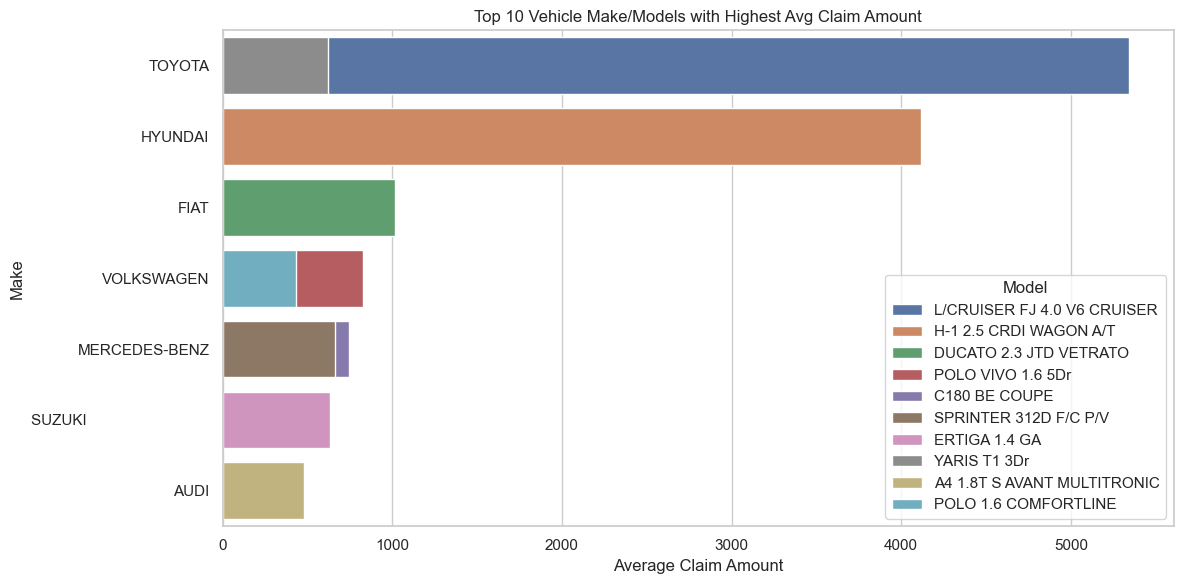

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_high_claims, x='avg_claim_amount', y='make', hue='Model', dodge=False)
plt.title('Top 10 Vehicle Make/Models with Highest Avg Claim Amount')
plt.xlabel('Average Claim Amount')
plt.ylabel('Make')
plt.tight_layout()
plt.show()
